(dl/01bb-gradient)=
# Gradient descent

Now that we have the empirical risk $\mathcal{L}_\mathcal{D}(\boldsymbol{\Theta})$ as objective, we proceed to the actual optimization algorithm. Given the current parameters $\boldsymbol{\Theta} \in \mathbb R^M$ of the network, we can imagine the network to be sitting on a point $(\boldsymbol{\Theta}, \mathcal L_{\mathcal{D}}(\boldsymbol{\Theta}))$ on a surface in $\mathbb R^M \times \mathbb R.$ The surface will generally vary for different samples of the training data. Training is equivalent to finding the minimum of this surface. 
Gradients arise in deep learning when making the following first-order approximation:

$$\Delta \mathcal L_{\mathcal{D}} \approx  \sum_k \left(\frac{\partial \mathcal L_{\mathcal{D}}}{ \partial {\Theta}_k} \right)  \Delta {\Theta}_k = \left( \nabla_{\boldsymbol{\Theta}}\, \mathcal L_{\mathcal{D}} \right) \cdot \Delta {\boldsymbol{\Theta}}.$$ 

It follows that $-\nabla_{\boldsymbol{\Theta}}\, \mathcal L_{\mathcal{D}}$ is the direction of steepest descent at the current point $(\boldsymbol{\Theta}, \mathcal L_{\mathcal{D}})$ in the surface. **Gradient descent** (GD) is defined by the update rule: 

$$
\boldsymbol{\Theta}^{t+1} = \boldsymbol{\Theta}^t - \eta\; \nabla_{\boldsymbol{\Theta}}\, \mathcal L_{\mathcal{D}}(\boldsymbol{\Theta}^t)
$$

where the **learning rate** $\eta > 0$ controls the step size. Note that finding a good set of **initial weights** $\boldsymbol{\Theta}^0 \in \mathbb{R}^M$ is crucial since networks has lots of internal symmetries and can diverge in the early stages of training. Later on we will see that other optimization algorithms in deep learning practice are just modifications of GD.

In [1]:
import numpy as np

def loss(w, X, y):
    return ((X @ w - y)**2).mean()

def grad(w, X, y, B=None):
    """Gradient step for the MSE loss function"""
    dw = 2*((X @ w - y).reshape(-1, 1) * X).mean(axis=0)
    return dw / np.linalg.norm(dw)

def grad_descent(w0, X, y, eta=0.1, steps=10):
    """Return sequence of weights from GD."""
    w = np.zeros([steps, 2])
    w[0, :] = w0
    for j in range(1, steps):
        u = w[j-1, :]
        w[j, :] = u - eta * grad(u, X, y)
    return w


# Generate data
n = 1000
X = np.zeros((n, 2))
X[:, 1] = np.random.uniform(low=-1, high=1, size=n)
X[:, 0] = 1
w_min = np.array([-1, 3])
y = (X @ w_min) + 0.05 * np.random.randn(n)  # data: y = -1 + 3x + noise

# Gradient descent
w_init = [-4, -4]
w_step = grad_descent(w_init, X, y, eta=1.0, steps=30)

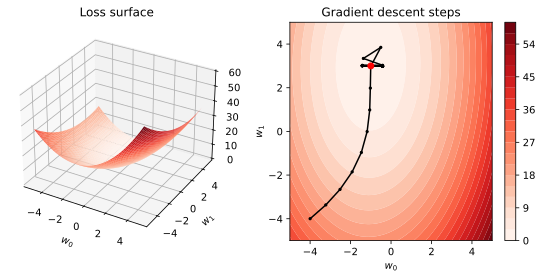

In [2]:
import matplotlib.pyplot as plt
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats("svg")
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting

def plot_surface(ax, data, target, N=50):
    x = np.linspace(-5, 5, N)
    y = np.linspace(-5, 5, N)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros_like(X)
    for i in range(N):
        for j in range(N):
            Z[i, j] = loss(np.array([X[i, j], Y[i, j]]), data, target)
    
    ax.plot_surface(X, Y, Z, cmap='Reds')
    ax.set_title("Loss surface")
    ax.set_xlabel(f'$w_0$')
    ax.set_ylabel(f'$w_1$')
    

def plot_contourf(ax, data, target, w_min, w_hist, N=50):
    x = np.linspace(-5, 5, N)
    y = np.linspace(-5, 5, N)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros_like(X)
    for i in range(N):
        for j in range(N):
            Z[i, j] = loss(np.array([X[i, j], Y[i, j]]), data, target)

    for t in range(1, len(w_hist)):
        ax.plot([w_hist[t-1][0], w_hist[t][0]], [w_hist[t-1][1], w_hist[t][1]], color='k')

    c = ax.contourf(X, Y, Z, levels=20, cmap='Reds')
    ax.scatter(w_min[0], w_min[1], color="red", label='min', zorder=3)
    ax.scatter(w_hist[:, 0], w_hist[:, 1], marker='o', s=5, facecolors='k')
    ax.set_title("Gradient descent steps")
    ax.set_xlabel(f'$w_0$')
    ax.set_ylabel(f'$w_1$')
    plt.colorbar(c, ax=ax)

# Create a figure and two subplots
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122)

# Call the functions with the respective axes
plot_surface(ax1, X, y)
plot_contourf(ax2, X, y, w_min, w_step)
plt.tight_layout()
plt.show()

Fig. *Loss surface* (left) *and gradient descent* (right) *of a linear function with MSE loss.*